In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.interpolate as interp
from astropy.io import ascii

In [2]:
jfo = ascii.read('2020jfo.dat', data_start = 3)
jfo

col1,col2,col3,col4,col5
float64,float64,float64,str24,str2
58975.25,15.399,0.05830951894845301,Palomar/ZTF.g,AB
58976.111,15.077,0.05220153254455275,SLOAN/SDSS.rprime_filter,AB
58976.156,14.695,0.05682429058070149,PAN-STARRS/PS1.g,AB
58976.161,15.063,0.05249761899362675,PAN-STARRS/PS1.r,AB
58976.164,15.27,0.05385164807134505,PAN-STARRS/PS1.i,AB
58976.17,15.55,0.06403124237432849,PAN-STARRS/PS1.z,AB
58976.3,14.516,0.06660330322138686,SLOAN/SDSS.gprime_filter,AB
58976.301,15.043,0.09097252332435328,SLOAN/SDSS.rprime_filter,AB
58976.302,15.278,0.05385164807134505,SLOAN/SDSS.iprime_filter,AB


In [3]:
jfo['col1']

58975.25
58976.111
58976.156
58976.161
58976.164
58976.17
58976.3
58976.301
58976.302
58977.177
58977.183


In [4]:
mjd_start = jfo['col1'][0]

In [5]:
np.unique(jfo['col4'])

PAN-STARRS/PS1.g
PAN-STARRS/PS1.i
PAN-STARRS/PS1.r
PAN-STARRS/PS1.z
Palomar/ZTF.g
Palomar/ZTF.r
SLOAN/SDSS.gprime_filter
SLOAN/SDSS.iprime_filter
SLOAN/SDSS.rprime_filter


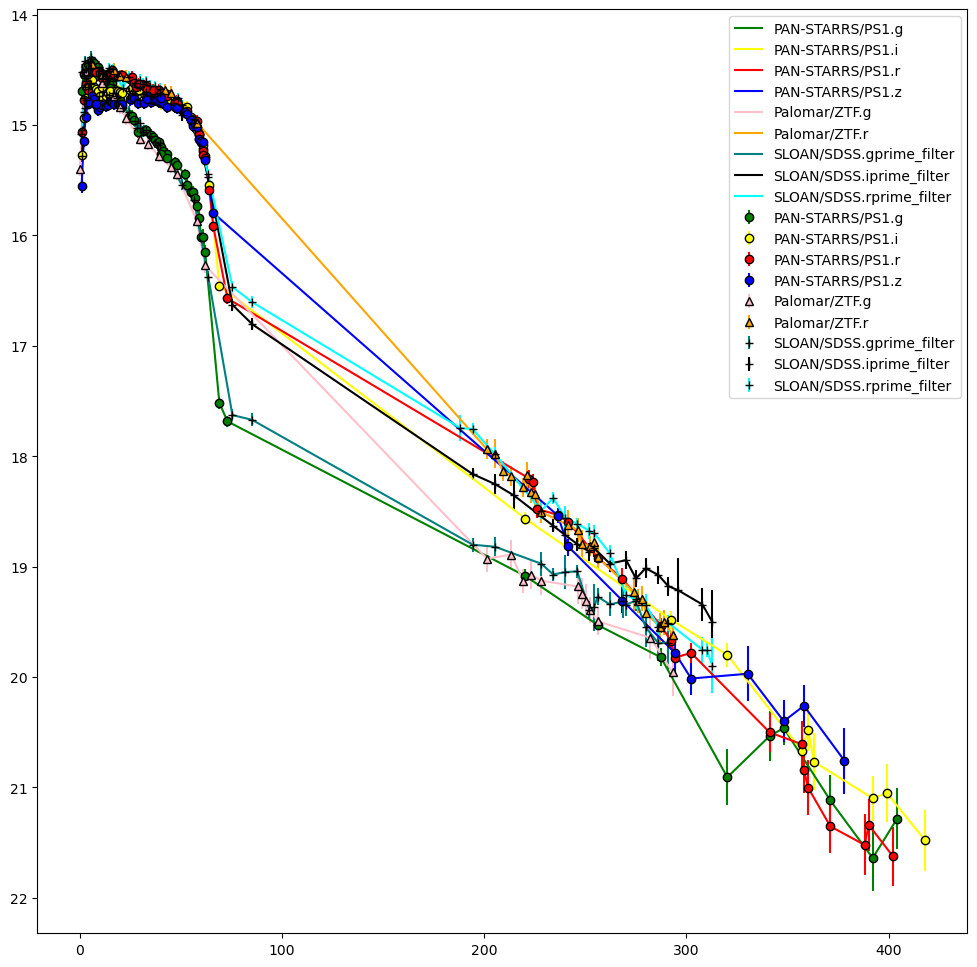

In [6]:
colors = {'PAN-STARRS/PS1.g':'green', 'PAN-STARRS/PS1.r':'red', 'PAN-STARRS/PS1.i':'yellow', 'PAN-STARRS/PS1.z':'blue', 'Palomar/ZTF.g':'pink', 
'Palomar/ZTF.r':'orange', 'SLOAN/SDSS.gprime_filter':'teal', 'SLOAN/SDSS.iprime_filter':'black', 'SLOAN/SDSS.rprime_filter':'cyan'}
PAN = {} 
ZTF = {} 
SDSS = {}
HST = {} 
plt.rcParams['figure.figsize'] = (12,12) 
for i, filt in enumerate(['PAN-STARRS/PS1.g', 'PAN-STARRS/PS1.i', 'PAN-STARRS/PS1.r', 'PAN-STARRS/PS1.z']):
    mask = jfo['col4'] == filt
    l = plt.errorbar(jfo[mask]['col1'] - mjd_start, jfo[mask]['col2'], yerr = jfo[mask]['col3'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
    PAN[filt] = l
for i, filt in enumerate(['Palomar/ZTF.g', 'Palomar/ZTF.r']):
    mask = jfo['col4'] == filt
    l = plt.errorbar(jfo[mask]['col1'] - mjd_start, jfo[mask]['col2'], yerr = jfo[mask]['col3'], fmt = '^', markeredgecolor = 'k', label = str(filt), color = colors[filt])
    ZTF[filt] = l
for i, filt in enumerate(['SLOAN/SDSS.gprime_filter', 'SLOAN/SDSS.iprime_filter', 'SLOAN/SDSS.rprime_filter']):
    mask = jfo['col4'] == filt 
    l = plt.errorbar(jfo[mask]['col1'] - mjd_start, jfo[mask]['col2'], yerr = jfo[mask]['col3'], fmt = '+', markeredgecolor = 'k', label = str(filt), color = colors[filt])
    SDSS[filt] = l 
for i in np.unique(jfo['col4']):
    mask = jfo['col4'] == i 
    time = jfo[mask]['col1'] - mjd_start
    mag = jfo[mask]['col2']
    sorted_idx = np.argsort(time)
    sorted_time = time[sorted_idx]
    sorted_mag = mag[sorted_idx]
    spline = interp.interp1d(sorted_time, sorted_mag, kind='linear')
    spline_x = np.linspace(sorted_time[0], sorted_time[-1], 1000)
    spline_y = spline(spline_x)
    plt.plot(spline_x, spline_y, color = colors[i], label = str(i)) 
plt.gca().invert_yaxis()

plt.legend()

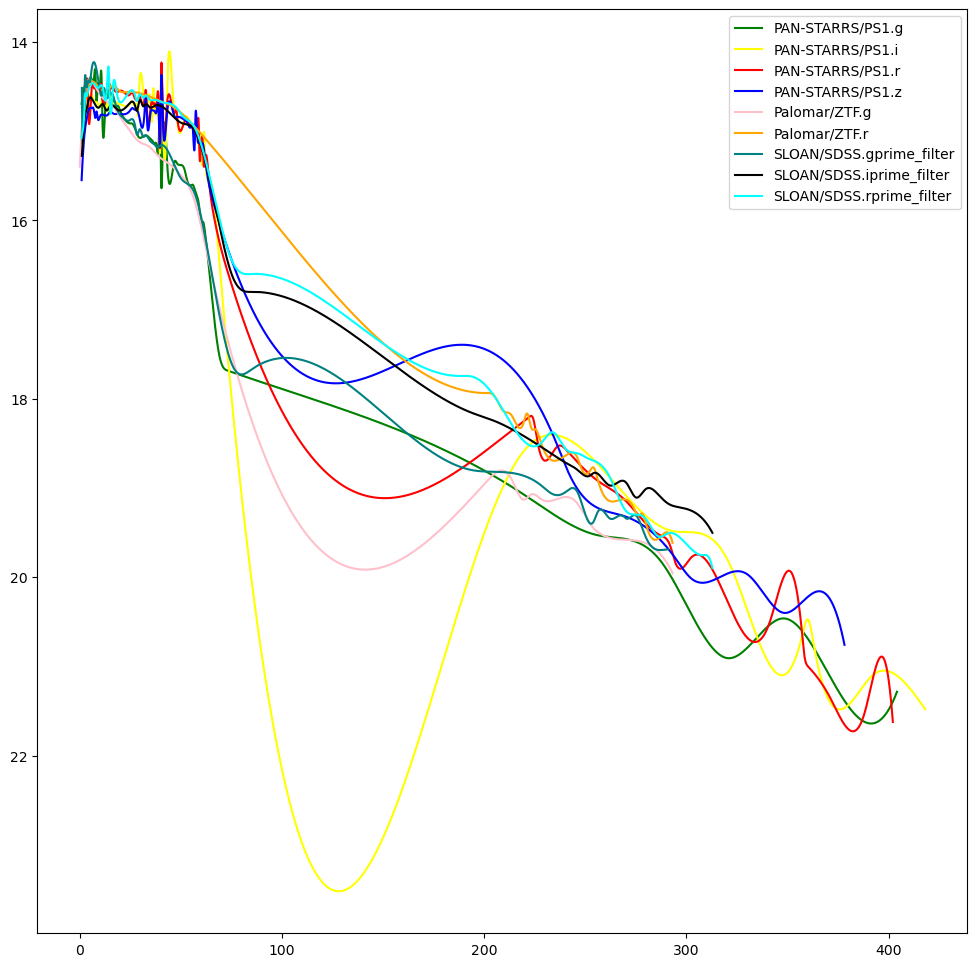

In [7]:
for i in np.unique(jfo['col4']):
    mask = jfo['col4'] == i 
    time = jfo[mask]['col1'] - mjd_start
    mag = jfo[mask]['col2']
    sorted_idx = np.argsort(time)
    sorted_time = time[sorted_idx]
    sorted_mag = mag[sorted_idx]
    spline = interp.CubicSpline(sorted_time, sorted_mag)
    spline_x = np.linspace(sorted_time[0], sorted_time[-1], 100000)
    spline_y = spline(spline_x)
    plt.plot(spline_x, spline_y, color = colors[i], label = str(i))
plt.gca().invert_yaxis()
plt.legend() 
